## Sensitivity Analysis with SALib
Python library info: https://salib.readthedocs.io/en/latest/

In [85]:
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.sample import fast_sampler
from SALib.sample import latin
from SALib.analyze import sobol
from SALib.analyze import fast
from SALib.test_functions import Ishigami
import numpy as np

In [23]:
problem = {
    'num_vars': 8,
    'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]
              ]
}

In [24]:
param_values = saltelli.sample(problem, 1000)
print(param_values.shape)

(18000, 8)


In [26]:
param_values = fast_sampler.sample(problem, 100)
print(param_values.shape)

(800, 8)


In [33]:
param_values[-10]

array([ 1.24637551,  1.24637551,  1.24637551,  1.24637551,  1.24637551,
        1.24637551,  1.24637551, -0.01026155])

#### Trying out with my own data & settings

In [74]:
params = {
    'num_vars': 10,
    'names': ['juv_leaves', 
              'staygreen',
              'rmax_ltar',
              'LAF',
              'LM_min',
              'Vcmax',
              'Vpmax',
              'g1',
              'ref_potential',
              'Topt'],
    'bounds': [[15,25],
               [3,8],
               [0.5,1],
               [1,3],
               [90,120],
               [60,100],
               [100,150],
               [3,10],
               [100,120],
               [30,35]]
}

In [75]:
param_values = fast_sampler.sample(params, 100)
param_values.shape

(1000, 10)

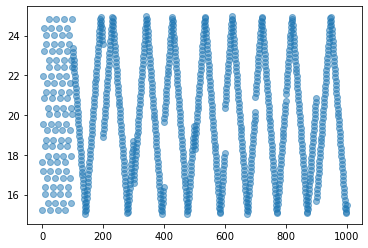

In [76]:
param_list = []
for i in np.arange(param_values.shape[0]):
    param_list.append(param_values[i, 0])

plt.scatter(list(np.arange(len(param_list))), param_list, alpha=0.5)

In [70]:
param_values = latin.sample(params, 100)
param_values.shape

(100, 10)

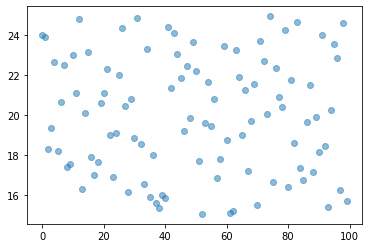

In [71]:
param_list = []
for i in np.arange(param_values.shape[0]):
    param_list.append(param_values[i, 0])

plt.scatter(list(np.arange(len(param_list))), param_list, alpha=0.5)

In [83]:
Y = Ishigami.evaluate(param_values)
len(Y)

1000

In [86]:
Si = fast.analyze(params, Y, print_to_console=False)

In [87]:
Si

{'S1': [0.06783498949865839,
  0.9251799048897631,
  9.171163994345672e-05,
  7.895621702961159e-05,
  7.585174499184594e-05,
  7.154069901512003e-05,
  7.990279760644376e-05,
  7.175308124075256e-05,
  7.395500017630054e-05,
  7.236548398971792e-05],
 'ST': [0.07092883333388977,
  0.931826172678197,
  0.0018929602783392951,
  0.001910183169254509,
  0.0018717173326049386,
  0.0018183007681682462,
  0.0019219116513490286,
  0.0018209323368182373,
  0.0018482155775846332,
  0.0018285204363108765],
 'names': ['juv_leaves',
  'staygreen',
  'rmax_ltar',
  'LAF',
  'LM_min',
  'Vcmax',
  'Vpmax',
  'g1',
  'ref_potential',
  'Topt']}